In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Some Data

#Mean Values
mean_01 = [1.0,0.5]
mean_02 = [5.0,6.0]

# Covariance Matrices - Meaasure of Variability about mean
cov_01 = [ [1.0,0.5], [0.5,1.0] ]
cov_02 = [ [1.0,0.1], [0.1,1.0] ]

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)


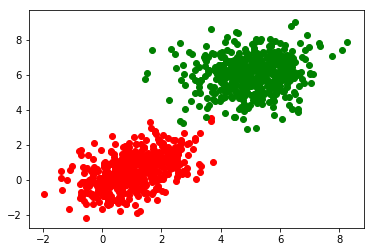

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1],c='red')
plt.scatter(dist_02[:,0],dist_02[:,1],c='green')
plt.show()

In [5]:
# data matrix definition
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1
data = np.zeros( (rows,cols) )

data[ :dist_01.shape[0], :2 ] = dist_01
data[ :dist_01.shape[0], -1 ] = 0.0

data[ dist_01.shape[0]: , :2 ] = dist_02
data[ dist_01.shape[0]: , -1 ] = 1.0

print(data.shape)

(1000, 3)


In [6]:
np.random.shuffle(data)
print (data)

[[-0.13072499 -0.33285953  0.        ]
 [-1.94584464 -0.77843303  0.        ]
 [ 4.53460109  5.96320119  1.        ]
 ..., 
 [ 5.93409467  6.55403828  1.        ]
 [ 2.0976415   1.69318857  0.        ]
 [-0.02954196 -0.07032396  0.        ]]


In [7]:
## Distance Function
def distance_euclid(pt1, pt2):
    d = np.sqrt( ( ( pt1 - pt2 )**2).sum() )
    return d

## Manhattan Distance
def manhattan_distance(pt1, pt2):
    d = abs( (pt1 - pt2) ).sum()
    return d

In [8]:
split = int(0.60*data.shape[0])

train_x = data[:split, :2]
train_y = data[ :split, -1 ]

test_x = data[split:, :2]
test_y = data[split:, -1]

print np.unique( train_y, return_counts= True )


(array([ 0.,  1.]), array([298, 302]))


In [9]:
def KNN(train_x, train_y, test_pt, k = 5):
    vals = []
    for ix in range(train_x.shape[0]):
        d = distance_euclid(train_x[ix], test_pt)
        vals.append([d, train_y[ix]])
    sorted_vals = sorted(vals, key = lambda r:r[0])
    sorted_vals = np.array(sorted_vals)[:k]
    labels = sorted_vals[:,-1]
    freq = np.unique(labels, return_counts=True)
    ans = freq[0][ freq[1].argmax() ]
    return ans

In [10]:
test_pt1 = np.array([2,2])
ans = KNN(train_x,train_y,test_pt1,k=5)
print ans

0.0


In [11]:
def get_acc(train_x,train_y, test_x, test_y, kx = 5):
    preds = []
    for ix in range(test_x.shape[0]):
        p = KNN(train_x,train_y,test_x[ix],k = kx)
        preds.append(p)
    preds = np.array(preds)
    acc = 100*float( (preds == test_y).sum() )/ test_y.shape[0]
    return acc

In [12]:
#print get_acc(train_x,train_y,test_x,test_y,kx = 5)

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('/Users/suruchichopra/Desktop/Suransh/Machine Learning/fashion-mnist_train.csv')
fashion_data = np.array(df)[:3000]
print fashion_data.shape

(3000, 785)


In [15]:
split = int(0.60*fashion_data.shape[0])

fashion_train_x = fashion_data[:split, 1:]
fashion_train_y = fashion_data[ :split, 0 ]

fashion_test_x = fashion_data[split: , 1: ]
fashion_text_y = fashion_data[ split:, 0 ]

print fashion_train_x.shape
#print get_acc(fashion_train_x,fashion_train_y,fashion_test_x, fashion_text_y)

(1800, 784)


In [16]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [17]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(fashion_train_x,fashion_train_y)
print(100*neigh.score(fashion_test_x,fashion_text_y))

79.9166666667
